# Técnicas Matemáticas para Big Data

### Professor:
    Professor Doutor Eugénio Rocha

## Work 2 - Group 3

### Group members:
    Alexandra Carvalho, 93346
    Henrique Gil, 89247 
    Teodora Santos, ...
    Umar Muhammad, 106409


# Fuzzy Inference System 
## Predicting the position of a WiFi router

### Dataset description
The dataset used in this work consists of a text file with the strength of the WiFi signal in 7 different locations, registered in an indoor space on a smartphone at different times. For each of the registrations there is also information about the position of the WiFi router. 

This dataset consists of a table with 8 columns, the first 7 with the strength of the WiFi signal in each of the locations and the last one with the identification of the position of the router (a number between 1 and 4). Each row represents a different registration of the signals on each location and there are 500 registrations for each of the router positions (2000 rows in total)

### Objective
The main goal of our analysis of this dataset is to create a fuzzy inference system that allows the determination of the position of the WiFi router based on the signal strengths registered at the 7 different locations described in this dataset (crisp input). To do that, we use the available data to create some rules that will then be used to predict the location of the router given a new registration of the WiFi signals in the same locations. 

### Why use fuzzy logic?
We chose to approach this problem using fuzzy logic because we believe it is a good representation of this problem, reason being that there is no clear separation of the WiFi signals of each of the locations for different router positions (i.e. registrations made for different router positions might have very similar WiFi strengths for the same locations), which will be better understood later when we create boxplots that allow for a better comprehension of the dataset.

### Brief description of this Fuzzy inference system
We start by creating the boxplot of the total data, followed by the boxplots for all the data corresponding to each router position. With the first boxplot, we, generally, divide the data into 5 different categories of signal strength (very low, low, neutral, high and very high) and create the fuzzy membership functions using this boxplot for each location. After that, comparing the boxplot of all the data with the boxplot for each router location, we create rules that try to infere on the position of the router (the Consequent). 

We start the algorithm by importing some necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import skfuzzy as fuzz

Besides pandas, numpy and matplotlib, all libraries very commonly used in this field, we also used skfuzzy, which is a library that serves as a toolbox for the implementation of fuzzy logic, with the use of a module called control, a good interface for the creation of our fuzzy system.

In the next cells we import the dataset and use some pandas tools to visualize the data matrix, as well as getting a table with some important parameters that describe this data.

In [2]:
df = pd.read_csv("wifi_localization.txt",sep="\t", header=None)
df = abs(df)
data = df[[0,1,2,3,4,5,6]]
df

,0,1,2,3,4,5,6,7
0,64,56,61,66,71,82,81,1
1,68,57,61,65,71,85,85,1
2,63,60,60,67,76,85,84,1
3,61,60,68,62,77,90,80,1
4,63,65,60,63,77,81,87,1
...,...,...,...,...,...,...,...,...
1995,59,59,48,66,50,86,94,4
1996,59,56,50,62,47,87,90,4
1997,62,59,46,65,45,87,88,4
1998,62,58,52,61,41,90,85,4


In [3]:
df.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.330500,55.623500,54.964000,53.566500,62.640500,80.985000,81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,10.000000,45.000000,40.000000,11.000000,36.000000,61.000000,63.000000,1.000000
25%,46.000000,53.000000,51.000000,46.000000,56.000000,77.000000,78.000000,1.750000
50%,55.000000,56.000000,55.000000,56.000000,64.000000,82.000000,83.000000,2.500000
75%,61.000000,58.000000,58.000000,63.000000,69.000000,86.000000,87.000000,3.250000
max,74.000000,74.000000,73.000000,77.000000,89.000000,97.000000,98.000000,4.000000


Next we create the boxplot with the representations of all of the data for each location, followed by the boxplot for all the data corresponding to each router position.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e8e914130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e8e8ed2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e8e914880>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0e8e89b130>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e8e89b880>,
 'means': []}

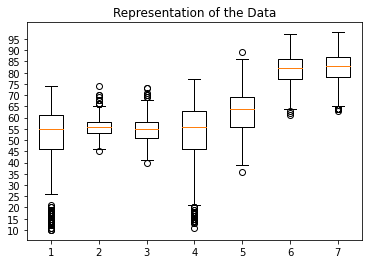

In [4]:
plt.yticks(range(0,100,5))
plt.title("Representation of the Data")
plt.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e8e74f490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e8e74abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e8e74f1c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0e8e740850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e8e733370>,
 'means': []}

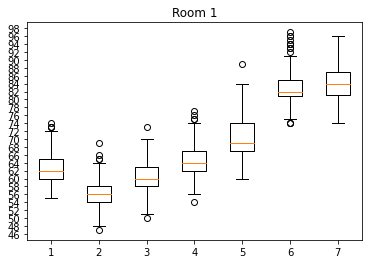

In [5]:
filt_room1 = (df[7]==1)
plt.yticks(range(40,100,2))
plt.title("Room 1")
plt.boxplot(data[filt_room1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e8e5dc2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e8e5d6040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e8e5d6fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0e8e634250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e8e640fa0>,
 'means': []}

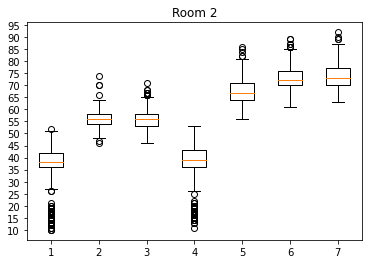

In [6]:
filt_room2 = (df[7]==2)
plt.yticks(range(0,100,5))
plt.title("Room 2")
plt.boxplot(data[filt_room2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e8e544e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e8e4fd250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e8e4ed2b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0e8e4fdf70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e8e50d280>,
 'means': []}

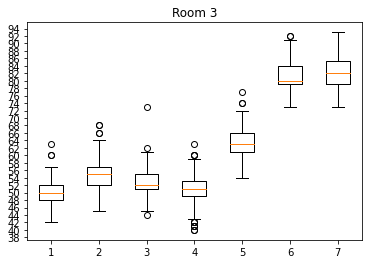

In [7]:
filt_room3 = (df[7]==3)
plt.yticks(range(20,100,2))
plt.title("Room 3")
plt.boxplot(data[filt_room3])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e8e39f760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e8e411fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e8e39feb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0e8e3af7c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e8e3afa90>,
 'means': []}

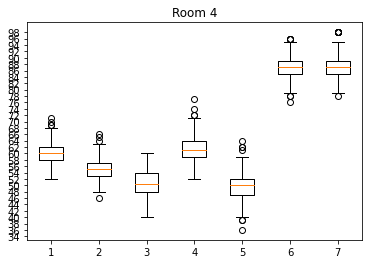

In [8]:
filt_room4 = (df[7]==4)
plt.yticks(range(30,100,2))
plt.title("Room 4")
plt.boxplot(data[filt_room4])

The first boxplot allows us to have an understanding of how the values of WiFi strength might vary throught all of the data, and we can make a side-by-side comparison between this first boxplot and the boxplot for each router position, to see what kind of values are expected in each location for each of the router positions, which will then allow us to create the fuzzy ruleset. 

Before that, we start by creating the fuzzy membership functions for each location based on the boxplot for all the data, where we analise the boxplot on each location and divide the data into 5 different categories, as described in the beggining of the work, except for locations 2 and 3, where we divided them into 3 categories, since their values have a much smaller range. Location 1 was divided in 6 categories, because of the large range of values it covered.

## FUZZIFICATION

#### Creation of Regions
When defining the membership functions for each variable, different types of functions can be generated: we considered Trapezoidal functions for the outmost values, and Triangular functions for the rest.

**Antecedents** - locations of WiFi signal measurements:

-Location 1

Universe (range of values): [5, 75]
Fuzzy Sets / Membership Functions: lowest, very_low,low,high, very_high, highest


-Location 2

Universe (range of values): [40, 75]
Fuzzy Sets / Membership Functions: low,neutral,high


-Location 3

Universe (range of values): [38, 75]
Fuzzy Sets / Membership Functions: very_low, low, high, very_high

-Location 4

Universe (range of values): [8, 78]
Fuzzy Sets / Membership Functions: very_low, low,neutral, high, very_high


-Location 5

Universe (range of values): [33, 90]
Fuzzy Sets / Membership Functions: very_low,low,neutral, high, very_high



-Location 6

Universe (range of values): [59, 100]
Fuzzy Sets / Membership Functions: very_low,low,neutral, high, very_high


-Location 7:

Universe (range of values): [62, 100]
Fuzzy Sets / Membership Functions: very_low,low,neutral, high, very_high


**Consequent:**
Router Location (Room Number): [1,2,3,4]

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


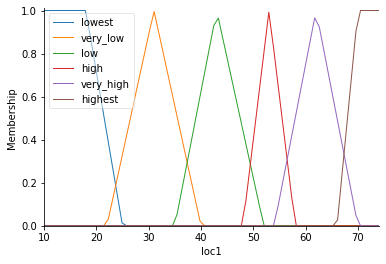

In [9]:
# Location 1

X = np.linspace(start=data[0].min(), stop=data[0].max(), num=data[0].max(), endpoint=True, retstep=False)
loc1 = ctrl.Antecedent(X, 'loc1')

interval1 = [5, 5, 18, 25]
interval2 = [22, int(((40-22)/2) + 22), 40]
interval3 = [35, int(((52-35)/2) + 35), 52]
interval4 = [48, int(((58-48)/2) + 48), 58]
interval5 = [54, int(((70-54)/2) + 54), 70]
interval6 = [66, 70, 78, 78]

loc1['lowest'] = fuzz.membership.trapmf(X, interval1)
loc1['very_low'] = fuzz.membership.trimf(X, interval2)
loc1['low'] = fuzz.membership.trimf(X, interval3)
loc1['high'] = fuzz.membership.trimf(X, interval4)
loc1['very_high'] = fuzz.membership.trimf(X, interval5)
loc1['highest'] = fuzz.membership.trapmf(X, interval6)
loc1.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


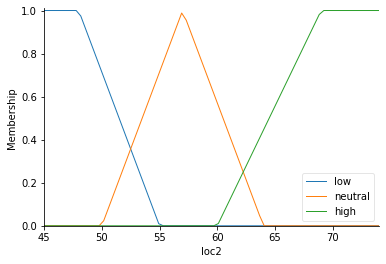

In [10]:
# Location 2

X = np.linspace(start=data[1].min(), stop=data[1].max(), num=data[1].max(), endpoint=True, retstep=False)
loc2 = ctrl.Antecedent(X, 'loc2')

interval1 = [38, 38, 48, 55]
interval2 = [50, int(((64-50)/2) + 50), 64]
interval3 = [60, 69, 75, 75]

loc2['low'] = fuzz.membership.trapmf(X, interval1)
loc2['neutral'] = fuzz.membership.trimf(X, interval2)
loc2['high'] = fuzz.membership.trapmf(X, interval3)
loc2.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


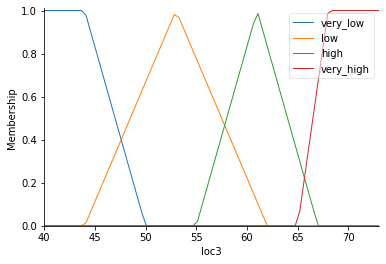

In [11]:
# Location 3
X = np.linspace(start=data[2].min(), stop=data[2].max(), num=data[2].max(), endpoint=True, retstep=False)
loc3 = ctrl.Antecedent(X, 'loc3')

interval1 = [38, 38, 44, 50]
interval2 = [44, int(((62-44)/2) + 44), 62]
interval3 = [55, int(((67-55)/2) + 55), 67]
interval4 = [65, 68, 75, 75]

loc3['very_low'] = fuzz.membership.trapmf(X, interval1)
loc3['low'] = fuzz.membership.trimf(X, interval2)
loc3['high'] = fuzz.membership.trimf(X, interval3)
loc3['very_high'] = fuzz.membership.trapmf(X, interval4)
loc3.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


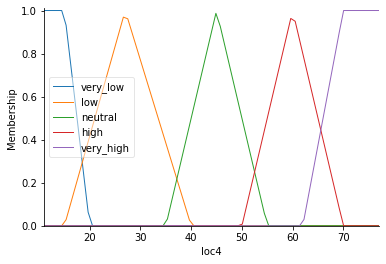

In [12]:
# Location 4

X = np.linspace(start=data[3].min(), stop=data[3].max(), num=data[3].max(), endpoint=True, retstep=False)
loc4 = ctrl.Antecedent(X, 'loc4')

interval1 = [8, 8, 15, 20]
interval2 = [15, int(((40-15)/2) + 15), 40]
interval3 = [35, int(((55-35)/2) + 35), 55]
interval4 = [50, int(((70-50)/2) + 50), 70]
interval5 = [62, 70, 78, 78]

loc4['very_low'] = fuzz.membership.trapmf(X, interval1)
loc4['low'] = fuzz.membership.trimf(X, interval2)
loc4['neutral'] = fuzz.membership.trimf(X, interval3)
loc4['high'] = fuzz.membership.trimf(X, interval4)
loc4['very_high'] = fuzz.membership.trapmf(X, interval5)
loc4.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


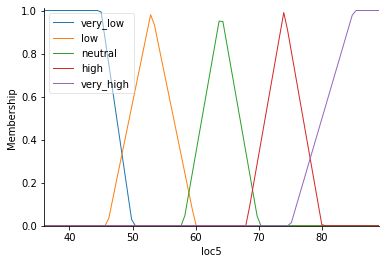

In [13]:
# Location 5

X = np.linspace(start=data[4].min(), stop=data[4].max(), num=data[4].max(), endpoint=True, retstep=False)
loc5 = ctrl.Antecedent(X, 'loc5')

interval1 = [33, 33, 45, 50]
interval2 = [46, int(((60-46)/2) + 46), 60]
interval3 = [58, int(((70-58)/2) + 58), 70]
interval4 = [68, int(((80-68)/2) + 68), 80]
interval5 = [75, 85, 90, 90]

loc5['very_low'] = fuzz.membership.trapmf(X, interval1)
loc5['low'] = fuzz.membership.trimf(X, interval2)
loc5['neutral'] = fuzz.membership.trimf(X, interval3)
loc5['high'] = fuzz.membership.trimf(X, interval4)
loc5['very_high'] = fuzz.membership.trapmf(X, interval5)
loc5.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


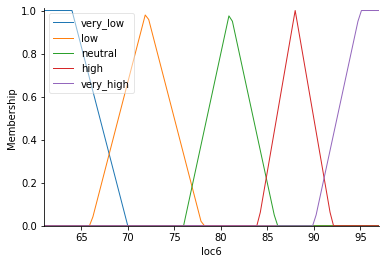

In [14]:
# Location 6

X = np.linspace(start=data[5].min(), stop=data[5].max(), num=data[5].max(), endpoint=True, retstep=False)
loc6 = ctrl.Antecedent(X,'loc6')

interval1 = [59, 59, 64, 70]
interval2 = [66, int(((78-66)/2) + 66), 78]
interval3 = [76, int(((86-76)/2) + 76), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90,95, 100, 100]

loc6['very_low'] = fuzz.membership.trapmf(X, interval1)
loc6['low'] = fuzz.membership.trimf(X, interval2)
loc6['neutral'] = fuzz.membership.trimf(X, interval3)
loc6['high'] = fuzz.membership.trimf(X, interval4)
loc6['very_high'] = fuzz.membership.trapmf(X, interval5)
loc6.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


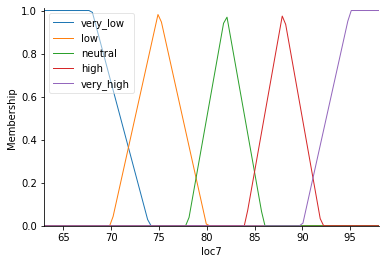

In [15]:
# Location 7

X = np.linspace(start=data[6].min(), stop=data[6].max(), num=data[6].max(), endpoint=True, retstep=False)
loc7 = ctrl.Antecedent(X, 'loc7')

interval1 = [62, 62, 68, 74]
interval2 = [70, int(((80-70)/2) + 70), 80]
interval3 = [78, int(((86-78)/2) + 78), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 95, 100, 100]

loc7['very_low'] = fuzz.membership.trapmf(X, interval1)
loc7['low'] = fuzz.membership.trimf(X, interval2)
loc7['neutral'] = fuzz.membership.trimf(X, interval3)
loc7['high'] = fuzz.membership.trimf(X, interval4)
loc7['very_high'] = fuzz.membership.trapmf(X, interval5)
loc7.view()

/home/alexa/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


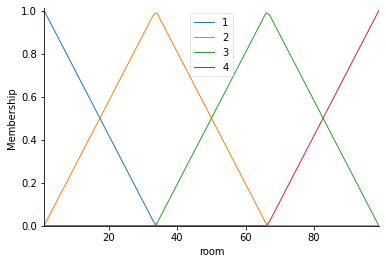

In [16]:
room = ctrl.Consequent(np.arange(1, 100, 1), 'room', defuzzify_method='mom')
room.automf(4, names=['1','2','3','4'])
room.view()

## FUZZY INFERENCE
In this stage of the algorithm, we define our Fuzzy System rules. We have defined 4 rules, one for each router position (rooms 1-4). To exemplify our thought process on the creation of these rules, we will explain rule 1.

By looking at the boxplot created at the beggining for room 1 (i.e. router position 1), and starting by the location 1, we can see that the majority of the values fall between 55 and 75, which, by looking at the membership functions for location 1, mainly corresponds to the very_high and highest classes. In this case (later we verified the same for every room), the values for location 2 are too sparse, falling across all the classes, therefore, it has no impact on the room inference. Using a similar thought process to that used for location 1, we verified that the majority of the values for location 3 fall in all classes, except for very_low. For location 4, the values fall into the high and very_high classes, for location 5 the values fall mainly into all the classes, except very_low and low, and for location 6 and location 7, the respective values fall into all classes, except the very_low class.

With this, we obtained the rule for room 1, and we repeated this process for the remaining rooms.


In [17]:
rule1 = ctrl.Rule((loc1['very_high'] | loc1['highest']) & ~(loc3['very_low']) & (loc4['high'] | loc4['very_high']) & ~(loc5['low'] | loc5['very_low']) & ~(loc6['very_low']) & ~(loc7['very_low']), room['1'])
rule2 = ctrl.Rule((loc1['low'] | loc1['very_low'] | loc1['lowest']) & ~(loc4['high'] | loc4['very_high']) & ~(loc5['very_low']) & ~(loc6['very_high']), room['2'])
rule3 = ctrl.Rule((loc1['high'] | loc1['low']) & (loc4['neutral'] | loc4['high']) & (loc5['neutral'] | loc5['low']) & ~(loc6['very_low']) & ~(loc7['very_low']), room['3'])
rule4 = ctrl.Rule((loc1['very_high']| loc1['highest']) & (loc3['low'] | loc3['high']) & (loc4['high'] | loc4['very_high']) & ~(loc5['neutral'] |loc5['high'] | loc5['very_high']) & ~(loc6['low'] | loc6['very_low']) & ~(loc7['very_low']|loc7['low']), room['4'])
problem_ctrl  = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

## DEFUZZIFICATION
In this stage the fuzzy rules defined in the previous step are now applied to each observation of the original dataset, computing the mean of the maximums on the resulting area, which we convert to a crisp router position identification. These values are stored in a file, side by side with the original label for each observation, in order for us to understand the accuracy of the implemented system.

In [25]:
## APPLICATION
f = open('results.txt','w')
prediction_values = []
column = pd.Series()
for row in range(0,2000):
    problem.input['loc1'] = df.iloc[row][0]
 
    problem.input['loc3'] = df.iloc[row][2]
    problem.input['loc4'] = df.iloc[row][3]
    problem.input['loc5'] = df.iloc[row][4]
    problem.input['loc6'] = df.iloc[row][5]
    problem.input['loc7'] = df.iloc[row][6]

    problem.compute()

    prediction = problem.output['room']
    if prediction < 30:
        my_class = '1'
    elif prediction < 50:
        my_class = '2'
    elif prediction < 80:
        my_class = '3'
    else:
        my_class = '4'

    f.write(str(df.iloc[row][7]) + ', ' + str(my_class) + '\n') 
    prediction_values += [prediction]

f.close()

/tmp/ipykernel_5377/2601002758.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  column = pd.Series()


In [26]:
results_df = pd.read_csv('results.txt',delimiter=', ', names=['original results', 'our results'])
stats = results_df['original results'] == results_df['our results']
print(stats.value_counts())

True     1492
False     508
dtype: int64


/home/alexa/.local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [27]:
prediction_values

[50.0,
 50.0,
 7.446428571428571,
 4.441666666666666,
 5.9818181818181815,
 9.462962962962964,
 7.446428571428571,
 9.462962962962964,
 7.446428571428571,
 5.416666666666666,
 50.0,
 7.446428571428571,
 9.462962962962964,
 9.462962962962964,
 5.9818181818181815,
 50.0,
 4.441666666666666,
 9.462962962962964,
 5.416666666666666,
 50.0,
 9.462962962962964,
 9.462962962962964,
 9.462962962962964,
 11.473484848484848,
 9.462962962962964,
 50.0,
 7.446428571428571,
 9.462962962962964,
 11.473484848484848,
 50.0,
 3.347222222222222,
 48.638888888888886,
 50.0,
 7.446428571428571,
 9.462962962962964,
 48.638888888888886,
 9.462962962962964,
 9.462962962962964,
 50.0,
 50.0,
 9.462962962962964,
 50.0,
 5.416666666666666,
 9.462962962962964,
 9.462962962962964,
 9.462962962962964,
 7.446428571428571,
 7.446428571428571,
 7.446428571428571,
 5.416666666666666,
 5.416666666666666,
 50.0,
 11.473484848484848,
 50.0,
 50.0,
 5.416666666666666,
 5.416666666666666,
 50.0,
 7.446428571428571,
 7.44642

## Results Analysis

In order for us to make this analysis, we loaded the results into a dataframe. By comparing the two columns of the dataframe, one referring to the original values and the other referring to our computed values, we could count the number of matching values. As we can see, from the 2000 values, our system got 508 of them wrong. We observed, through the predicted values obtained, that the incorrect inferences had predictions close to 50 (if it would be slightly below the prediction would be the position 2, and if 50 or slightly above it would be position 3). Moreover, the right predictions had high membership values corresponding to the correct position. Based on this information, we understand that those predictions were instances where the rules defined weren't enough for the system to make any valid prediction. 

To improve this value we should adjust the membership functions, in order to better represent reality, and, consequently, adjust the rules to obtain better results.